In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd
import numpy as np
from numpy import dot
from numpy.linalg import norm
import datetime as dt
import math as mt
from pymongo import MongoClient as mc
import IPython
import IPython.display
from sklearn.decomposition import TruncatedSVD 
from scipy.spatial import distance
import scipy.stats
from modules.models import *
from modules.utils import *

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='AppleGothic')  # MacOS
# matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

mongo_uri = "mongodb://localhost:27017"
mongoClient = mc(mongo_uri)
proto_col = mongoClient.reco_contract.prototype

In [3]:
result = proto_col.insert_one({
            "fileName": "test",
            "step": "read_excel",
            "data": xlsx.to_dict(),
            "createdAt": dt.datetime.now(),
            "updatedAt": dt.datetime.now()
        })
print("insert success :)", result.inserted_id)

NameError: name 'xlsx' is not defined

In [3]:
# 1. read datas.xlsx
xlsx = load_excel("datas/datas.xlsx")

### 1->2, 읽혀진 xlsx 출력으로 받아서 사용

In [4]:
# 2. data pre-processing
p, m = data_preprocessing(xlsx)

### 2->3 : month_usage_df, peak_df 출력으로 받아서, 사용

In [5]:
m

,month,아파트1-101-1002,아파트1-101-104,아파트1-101-1102,아파트1-101-1202,아파트1-101-1302,아파트1-101-1401,아파트1-101-1403,아파트1-101-1502,아파트1-101-1504,...,아파트4-104-101,아파트4-104-1301,아파트4-104-1501,아파트4-104-301,아파트4-105-102,아파트4-105-103,아파트4-105-1102,아파트4-105-1104,아파트4-105-601,아파트4-105-803
0,1,253,689,183,239,455,343,380,219,389,...,335,363,181,216,270,518,230,279,161,156
1,2,251,481,177,218,397,297,339,197,348,...,309,339,146,184,267,344,208,236,167,150
2,3,255,424,203,222,378,303,349,202,357,...,313,372,152,236,268,417,212,272,166,155
3,4,252,355,180,230,368,278,298,188,346,...,266,346,149,210,268,421,208,243,156,148
4,5,230,357,258,203,414,270,418,156,320,...,305,256,151,222,287,349,185,284,165,180
5,6,212,363,272,207,411,275,398,149,265,...,240,257,145,212,353,413,212,292,153,148
6,7,326,423,416,204,597,350,477,210,374,...,492,469,179,294,566,574,362,459,181,227
7,8,431,454,450,207,701,411,505,236,385,...,512,394,177,283,559,562,245,388,199,224
8,9,207,334,198,188,445,299,369,153,261,...,274,242,146,233,328,371,207,278,182,181
9,10,219,390,135,212,439,281,346,175,296,...,280,254,165,232,278,357,227,294,147,181


In [6]:
p

,month,peak (kW)
0,1,224.0
1,2,224.0
2,3,212.0
3,4,208.0
4,5,152.0
5,6,200.0
6,7,356.0
7,8,356.0
8,9,204.0
9,10,192.0


In [7]:
month_datas_df = m.set_index('month')

In [8]:
month_datas_df

,아파트1-101-1002,아파트1-101-104,아파트1-101-1102,아파트1-101-1202,아파트1-101-1302,아파트1-101-1401,아파트1-101-1403,아파트1-101-1502,아파트1-101-1504,아파트1-101-1602,...,아파트4-104-101,아파트4-104-1301,아파트4-104-1501,아파트4-104-301,아파트4-105-102,아파트4-105-103,아파트4-105-1102,아파트4-105-1104,아파트4-105-601,아파트4-105-803
month,,,,,,,,,,,,,,,,,,,,,
1,253,689,183,239,455,343,380,219,389,350,...,335,363,181,216,270,518,230,279,161,156
2,251,481,177,218,397,297,339,197,348,288,...,309,339,146,184,267,344,208,236,167,150
3,255,424,203,222,378,303,349,202,357,368,...,313,372,152,236,268,417,212,272,166,155
4,252,355,180,230,368,278,298,188,346,365,...,266,346,149,210,268,421,208,243,156,148
5,230,357,258,203,414,270,418,156,320,265,...,305,256,151,222,287,349,185,284,165,180
6,212,363,272,207,411,275,398,149,265,254,...,240,257,145,212,353,413,212,292,153,148
7,326,423,416,204,597,350,477,210,374,441,...,492,469,179,294,566,574,362,459,181,227
8,431,454,450,207,701,411,505,236,385,533,...,512,394,177,283,559,562,245,388,199,224
9,207,334,198,188,445,299,369,153,261,258,...,274,242,146,233,328,371,207,278,182,181


In [114]:
peak_df = pd.DataFrame(columns=['date','peak (kW)'])
household_kWh_df = pd.DataFrame(columns=['name', 'usage (kWh)'])
now_month = 2

# Set Peak Data
year = 2020
months = [3,4,5,6,7,8,9,10,11,12,1,2]
peak_kW = [95,95,94,90,91,72,66,87,91,85,100,95]
household_kWh = [150, 180, 220, 210, 310, 300, 270, 190, 250, 260]

for idx,month in enumerate(months):
    if month == 1:
        year += 1
    peak_df = peak_df.append({
        "date": dt.datetime(
            year,
            month,
            1
        ),
        "peak (kW)": peak_kW[idx]
    }, ignore_index=True)
    
peak_df['peak (kW)'] = pd.to_numeric(peak_df['peak (kW)'])
    
# Set Household Data
for _ in range(0, 10):
    household_kWh_df = household_kWh_df.append({
        "name": str(_ + 1) + "01호",
        "usage (kWh)": household_kWh[_]
    }, ignore_index=True)
household_kWh_df['usage (kWh)'] = pd.to_numeric(
                household_kWh_df['usage (kWh)']
        )

peak_df
household_kWh_df

,name,usage (kWh)
0,101호,150
1,201호,180
2,301호,220
3,401호,210
4,501호,310
5,601호,300
6,701호,270
7,801호,190
8,901호,250
9,1001호,260


In [121]:
name = '아파트4-105-103'

test = pd.DataFrame(columns=['name', 'usage (kWh)'])
test = test.append({
    "name": name,
    "usage (kWh)": month_datas_df[name].loc[1]
}, ignore_index=True)

test

,name,usage (kWh)
0,아파트4-105-103,518


In [152]:
calc = ManagementOffice(
    month=1,
    peaks=peak_df,
    households=household_kWh_df,
    APT=3000,
    contract="종합계약",
    general_fee_info=['고압 B', 2]
)

공용설비사용량 : 660 kWh
요금계약전력 : 22.0 kW


In [153]:
calc.public.elec_bill_vat_fund

275350

In [141]:
calc.households[0].elec_bill_vat_fund

11930

In [82]:
calc = ManagementOffice(
    month=month,
    peaks=peak_df,
    households=month_datas_df,
    APT=APT,
    contract="종합계약",
    general_fee_info=['고압 A', 1]
)

NameError: name 'month' is not defined

In [7]:
# 3. caculator bill
min_per = 10
max_per = 80

result = bill_calc(m, p, min_per, max_per)

In [11]:
result['better']['comp']

,10,11,12,13,14,15,16,17,18,19,...,71,72,73,74,75,76,77,78,79,80
1,11.0,13.0,15.0,18.0,18.0,19.0,22.0,24.0,35.0,44.0,...,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0
2,13.0,16.0,18.0,20.0,21.0,28.0,37.0,41.0,52.0,60.0,...,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0
3,52.0,70.0,82.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,...,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0
4,65.0,76.0,93.0,113.0,113.0,113.0,113.0,113.0,113.0,113.0,...,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0
6,4.0,5.0,5.0,6.0,8.0,8.0,9.0,12.0,18.0,19.0,...,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0
9,62.0,81.0,95.0,114.0,137.0,137.0,137.0,137.0,137.0,137.0,...,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0
10,57.0,73.0,88.0,103.0,115.0,115.0,115.0,115.0,115.0,115.0,...,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0


In [9]:
# 4. analysis datas
analysis_result = analysis(result)

means = analysis_result['mean']
anal = analysis_result['anaylsis']

[0, 9, 3, 8]
[0, 9, 3, 1]
[0, 1, 2, 4, 5, 6, 10]
[0, 1, 2, 3, 5, 7, 8, 10, 11]
[0, 1, 3, 4, 5, 7]
[0, 1, 2, 3, 4, 5, 7, 9]


In [33]:
means

{'better': {'comp': {'positive': 33,
   'negative': 32,
   'pattern': array([ 24.,  30.,  36.,  42.,  46.,  47.,  49.,  50.,  54.,  56.,  59.,
           63.,  70.,  86.,  94., 109., 117., 126., 142., 147., 180., 189.,
          197., 205., 225., 235., 243., 281., 293., 302., 307., 312., 319.,
          324., 342., 346., 349., 354., 358., 362., 367., 371., 372., 374.,
          378., 386., 390., 393., 394., 395., 396., 397., 397., 398., 398.,
          398., 398., 398., 398., 398., 398., 398., 398., 398., 398., 398.,
          398., 398., 398., 398., 398.])},
  'single': {'positive': 32,
   'negative': 33,
   'pattern': array([374., 368., 362., 356., 352., 351., 349., 348., 344., 342., 339.,
          335., 328., 312., 304., 289., 281., 272., 256., 251., 218., 209.,
          201., 193., 173., 163., 155., 117., 105.,  96.,  91.,  86.,  79.,
           74.,  56.,  52.,  49.,  44.,  40.,  36.,  31.,  27.,  26.,  24.,
           20.,  12.,   8.,   5.,   4.,   3.,   2.,   1.,   1.,   0.,  

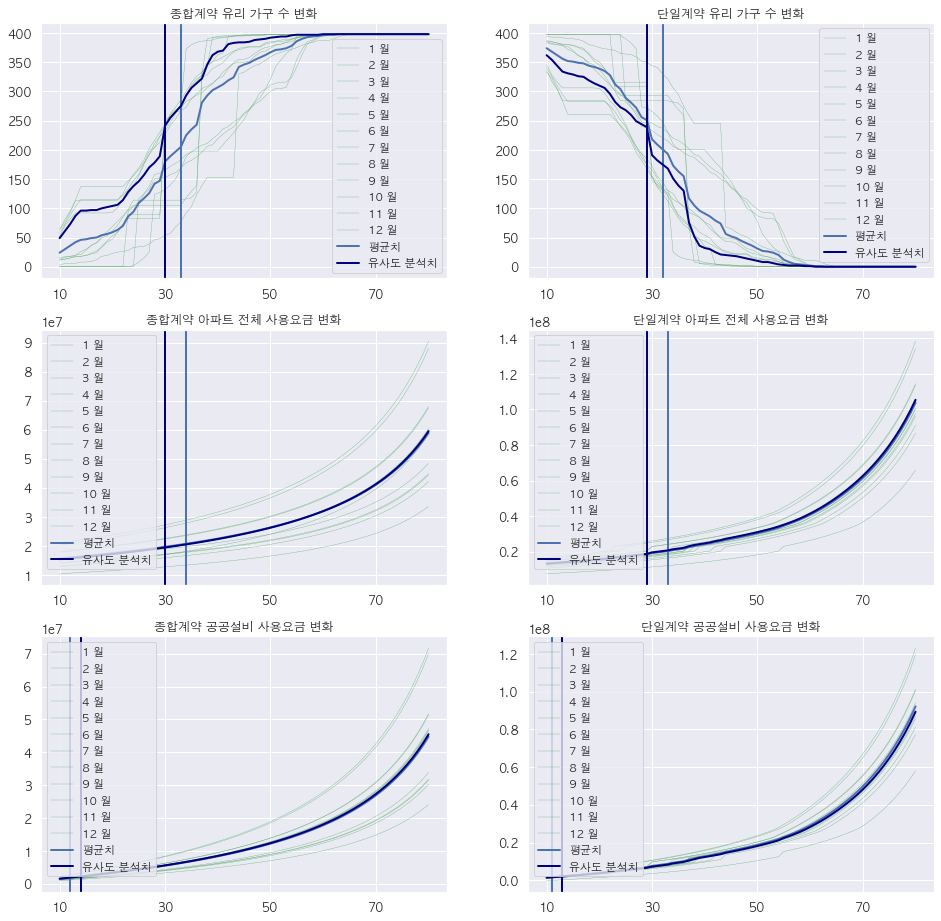

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16))

r, c = 0, 0
main, sub = 'better', 'comp'
axs[r][c].set_title("종합계약 유리 가구 수 변화")
axs[r][c].set_xticks(range(10, 80, 20))
for idx in result[main][sub].index:
    axs[r][c].plot(range(min_per, max_per + 1),result[main][sub].loc[idx], linewidth=0.3, color='g', label="{} 월".format(idx))
axs[r][c].plot(range(min_per, max_per + 1),means[main][sub]['pattern'], linewidth=2, color='b', label="평균치")
axs[r][c].axvline(means[main][sub]['positive'], color='b', linestyle='-', linewidth=2)
axs[r][c].plot(range(min_per, max_per + 1),anal[main][sub]['pattern'], linewidth=2, color='navy', label="유사도 분석치")
axs[r][c].axvline(anal[main][sub]['positive'], color='navy', linestyle='-', linewidth=2)
axs[r][c].legend()

r, c = 0, 1
main, sub = 'better', 'single'
axs[r][c].set_title("단일계약 유리 가구 수 변화")
axs[r][c].set_xticks(range(10, 80, 20))
for idx in result[main][sub].index:
    axs[r][c].plot(range(min_per, max_per + 1),result[main][sub].loc[idx], linewidth=0.3, color='g', label="{} 월".format(idx))
axs[r][c].plot(range(min_per, max_per + 1),means[main][sub]['pattern'], linewidth=2, color='b', label="평균치")
axs[r][c].axvline(means[main][sub]['positive'], color='b', linestyle='-', linewidth=2)
axs[r][c].plot(range(min_per, max_per + 1),anal[main][sub]['pattern'], linewidth=2, color='navy', label="유사도 분석치")
axs[r][c].axvline(anal[main][sub]['positive'], color='navy', linestyle='-', linewidth=2)
axs[r][c].legend()

r, c = 1, 0
main, sub = 'bill', 'comp'
axs[r][c].set_title("종합계약 아파트 전체 사용요금 변화")
axs[r][c].set_xticks(range(10, 80, 20))
for idx in result[main][sub].index:
    axs[r][c].plot(range(min_per, max_per + 1),result[main][sub].loc[idx], linewidth=0.3, color='g', label="{} 월".format(idx))
axs[r][c].plot(range(min_per, max_per + 1),means[main][sub]['pattern'], linewidth=2, color='b', label="평균치")
axs[r][c].axvline(means[main][sub]['positive'], color='b', linestyle='-', linewidth=2)
axs[r][c].plot(range(min_per, max_per + 1),anal[main][sub]['pattern'], linewidth=2, color='navy', label="유사도 분석치")
axs[r][c].axvline(anal[main][sub]['positive'], color='navy', linestyle='-', linewidth=2)
axs[r][c].legend()

r, c = 1, 1
main, sub = 'bill', 'single'
axs[r][c].set_title("단일계약 아파트 전체 사용요금 변화")
axs[r][c].set_xticks(range(10, 80, 20))
for idx in result[main][sub].index:
    axs[r][c].plot(range(min_per, max_per + 1),result[main][sub].loc[idx], linewidth=0.3, color='g', label="{} 월".format(idx))
axs[r][c].plot(range(min_per, max_per + 1),means[main][sub]['pattern'], linewidth=2, color='b', label="평균치")
axs[r][c].axvline(means[main][sub]['positive'], color='b', linestyle='-', linewidth=2)
axs[r][c].plot(range(min_per, max_per + 1),anal[main][sub]['pattern'], linewidth=2, color='navy', label="유사도 분석치")
axs[r][c].axvline(anal[main][sub]['positive'], color='navy', linestyle='-', linewidth=2)
axs[r][c].legend()

r, c = 2, 0
main, sub = 'public_bill', 'comp'
axs[r][c].set_title("종합계약 공공설비 사용요금 변화")
axs[r][c].set_xticks(range(10, 80, 20))
for idx in result[main][sub].index:
    axs[r][c].plot(range(min_per, max_per + 1),result[main][sub].loc[idx], linewidth=0.3, color='g', label="{} 월".format(idx))
axs[r][c].plot(range(min_per, max_per + 1),means[main][sub]['pattern'], linewidth=2, color='b', label="평균치")
axs[r][c].axvline(means[main][sub]['positive'], color='b', linestyle='-', linewidth=2)
axs[r][c].plot(range(min_per, max_per + 1),anal[main][sub]['pattern'], linewidth=2, color='navy', label="유사도 분석치")
axs[r][c].axvline(anal[main][sub]['positive'], color='navy', linestyle='-', linewidth=2)
axs[r][c].legend()

r, c = 2, 1
main, sub = 'public_bill', 'single'
axs[r][c].set_title("단일계약 공공설비 사용요금 변화")
axs[r][c].set_xticks(range(10, 80, 20))
for idx in result[main][sub].index:
    axs[r][c].plot(range(min_per, max_per + 1),result[main][sub].loc[idx], linewidth=0.3, color='g', label="{} 월".format(idx))
axs[r][c].plot(range(min_per, max_per + 1),means[main][sub]['pattern'], linewidth=2, color='b', label="평균치")
axs[r][c].axvline(means[main][sub]['positive'], color='b', linestyle='-', linewidth=2)
axs[r][c].plot(range(min_per, max_per + 1),anal[main][sub]['pattern'], linewidth=2, color='navy', label="유사도 분석치")
axs[r][c].axvline(anal[main][sub]['positive'], color='navy', linestyle='-', linewidth=2)
axs[r][c].legend()


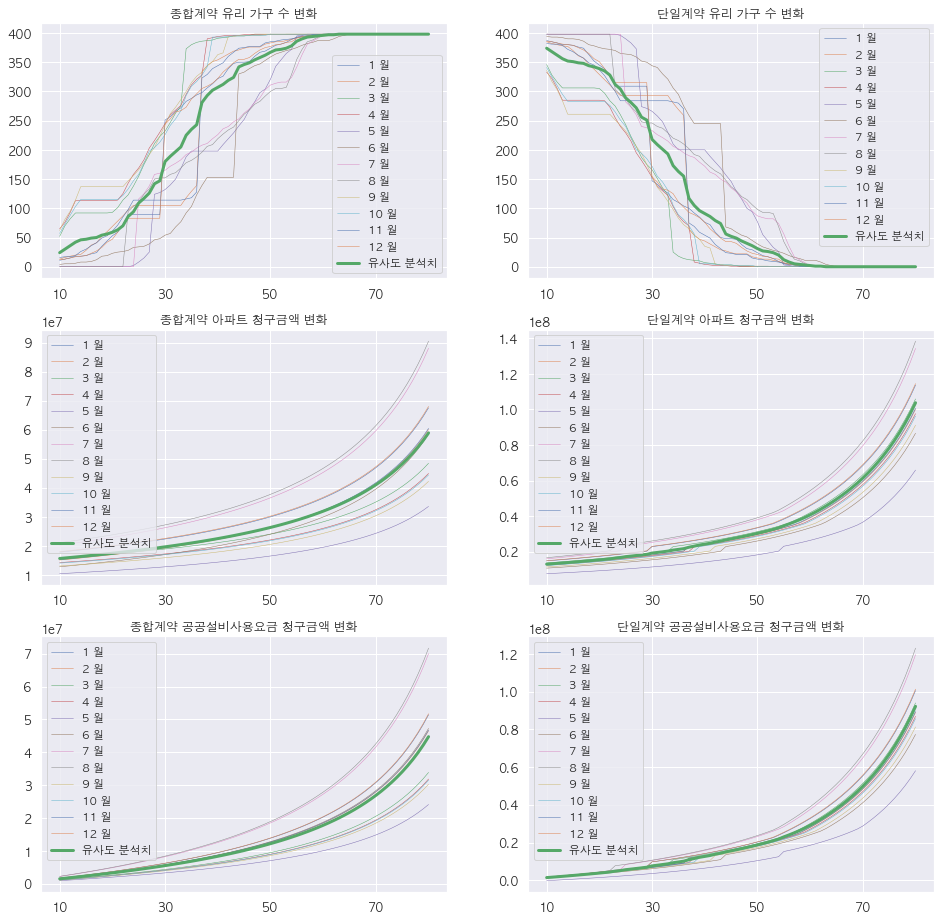

In [389]:
# view 예시
fig, axs = plt.subplots(3, 2, figsize=(16, 16))

draw_result(result, means, -1, 0, None, axs, "유사도 분석치")